<a href="https://colab.research.google.com/github/mdsajidali/cloudmachinelearning/blob/main/MohdSajidAli_CML_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Name: Mohd Sajid Ali
Project: Cloud Machine Learning
Dataset: DHA105.20250320063144.csv
Dataset link: https://data.gov.ie/dataset/dha105-average-length-of-stay-by-principal-procedure-and-area
Student ID: x23293519
Assigned Algorithm: Gradient Boosting
"""

'\nName: Mohd Sajid Ali\nProject: Cloud Machine Learning\nDataset: DHA105.20250320063144.csv\nDataset link: https://data.gov.ie/dataset/dha105-average-length-of-stay-by-principal-procedure-and-area\nStudent ID: x23293519\nAssigned Algorithm: Gradient Boosting\n'

In [ ]:
#Fetching dataset from AWS S3 bucket
import requests

url = "https://cml-project-23293519.s3.eu-west-1.amazonaws.com/DHA105.20250320063144.csv"
response = requests.get(url)
print("Trying to Download Dataset from AWS S3 bucket...")
if response.status_code == 200:
    with open("/content/drive/MyDrive/Datasets/DHA105.20250320063144.csv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully!", file.name)
else:
    print("Failed to download file.")

Trying to Download Dataset from AWS S3 bucket...
File downloaded successfully! /content/drive/MyDrive/Datasets/DHA105.20250320063144.csv


In [ ]:
#Importing the pandas library to work on the dataset
import pandas as pd

#Defining Dataframe and loading the dataset in CSV file
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/DHA105.20250320063144.csv')

In [ ]:
#Checking the available columns in the dataset
print('Available columns:')
df1.columns

Available columns:


Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02199V02655',
       'Sex', 'C02857V03435', 'Type of Procedure', 'C04369V05150', 'Age Group',
       'Area', 'UNIT', 'VALUE'],
      dtype='object')

In [ ]:
#Removing the columns which are not necessary
print("Droping columns: 'STATISTIC', 'TLIST(A1)','C02199V02655', 'C02857V03435', 'C04369V05150'")
df1= df1.drop(['STATISTIC', 'TLIST(A1)','C02199V02655', 'C02857V03435', 'C04369V05150'  ], axis=1)

#checking the number of available columns and count of the rows
print("Number of available columns and rows")
df1.shape


Droping columns: 'STATISTIC', 'TLIST(A1)','C02199V02655', 'C02857V03435', 'C04369V05150'
Number of available columns and rows


(99876, 8)

In [ ]:
#Verifying dataset
print("Updated dataset")
df1.head(100)

Updated dataset


,Statistic Label,Year,Sex,Type of Procedure,Age Group,Area,UNIT,VALUE
0,Average Length of Stay,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Clare,Rate,7.98
1,Average Length of Stay,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cork,Rate,7.36
2,Average Length of Stay,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cavan,Rate,10.76
3,Average Length of Stay,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Carlow,Rate,9.63
4,Average Length of Stay,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Donegal,Rate,7.52
...,...,...,...,...,...,...,...,...
95,Average Length of Stay,2017,Both sexes,Discectomy,0 - 14 years,Co. Kilkenny,Rate,12.91
96,Average Length of Stay,2017,Both sexes,Discectomy,0 - 14 years,Co. Kerry,Rate,2.95
97,Average Length of Stay,2017,Both sexes,Discectomy,0 - 14 years,Co. Longford,Rate,4.38
98,Average Length of Stay,2017,Both sexes,Discectomy,0 - 14 years,Co. Louth,Rate,5.17


In [ ]:
#dropping empty values in the dataset
print("Droping empty or 'NA' values")
df1.dropna(inplace=True)
#removing duplicate data
print("Removing duplicates..")
df1.drop_duplicates(inplace=True)
#checking the number of rows
print("Updated Number of Columns and Rows")
df1.shape

Droping empty or 'NA' values
Removing duplicates..
Updated Number of Columns and Rows


(70880, 8)

In [ ]:
#selecting only "Average Length of Stay" values from column "Statistic Label"
#Filtering only the average values
print("Filtering only 'Average Length of Stay' from column 'Statistic Label'")
df1=df1[df1['Statistic Label']=="Average Length of Stay"]
print("Updated count")
df1.shape

Filtering only 'Average Length of Stay' from column 'Statistic Label'
Updated count


(35440, 8)

In [ ]:
#Droping the unnecessary columns as we have already applied filter to take average values
print("Post filteration droping columns: 'Statistic Label', 'UNIT' ")
df1=df1.drop(columns=['Statistic Label', 'UNIT'])
df1.columns


Post filteration droping columns: 'Statistic Label', 'UNIT' 


Index(['Year', 'Sex', 'Type of Procedure', 'Age Group', 'Area', 'VALUE'], dtype='object')

In [ ]:
#Checking the updated dataset
print('Updated dataset')
df1

Updated dataset


,Year,Sex,Type of Procedure,Age Group,Area,VALUE
0,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Clare,7.98
1,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cork,7.36
2,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cavan,10.76
3,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Carlow,9.63
4,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Donegal,7.52
...,...,...,...,...,...,...
49933,2023,Female,All procedures,85 years and over,Co. Westmeath,6.35
49934,2023,Female,All procedures,85 years and over,Co. Wexford,7.65
49935,2023,Female,All procedures,85 years and over,Non-residents,6.84
49936,2023,Female,All procedures,85 years and over,Ireland plus non-residents,8.04


In [ ]:
#renaming column to merge with other 2 dataset
print("Renamed column: 'Type of Procedure' to 'Service'")
df1=df1.rename(columns={'Type of Procedure':'Service'})
df1

Renamed column: 'Type of Procedure' to 'Service'


,Year,Sex,Service,Age Group,Area,VALUE
0,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Clare,7.98
1,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cork,7.36
2,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Cavan,10.76
3,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Carlow,9.63
4,2017,Both sexes,Procedures on nervous system,0 - 14 years,Co. Donegal,7.52
...,...,...,...,...,...,...
49933,2023,Female,All procedures,85 years and over,Co. Westmeath,6.35
49934,2023,Female,All procedures,85 years and over,Co. Wexford,7.65
49935,2023,Female,All procedures,85 years and over,Non-residents,6.84
49936,2023,Female,All procedures,85 years and over,Ireland plus non-residents,8.04


In [ ]:
#exporting my cleaned dataset
cleaned_dataset = df1
cleaned_dataset.to_csv('/content/drive/MyDrive/Datasets/cleaned_DHA105_dataset.csv', index=False)
print('Cleaned dataset has been successfully exported as:', "cleaned_DHA105_dataset.csv")

Cleaned dataset has been successfully exported as: cleaned_DHA105_dataset.csv


In [ ]:
#loading other datasets from team members to merge in a single dataset
#Dataset from Harshvardhan Mulay- DHA92
#Datset from Sravan Kumar Goud - DHA113
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_DHA105_dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_dataset_DHA92 (1).csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned_DHA113.csv')
merged_data = pd.concat([df1, df2, df3], ignore_index=True)
merged_data.to_csv('/content/drive/MyDrive/Datasets/merged_dataset.csv', index=False)
print("Merged dataset has been generated: " "merged_dataset.csv")

Merged dataset has been generated: merged_dataset.csv


In [ ]:
#loading the merged dataset
df_merged_dataset= pd.read_csv('/content/drive/MyDrive/Datasets/merged_dataset.csv')
df11=df_merged_dataset
print("Converting categorical data to numerical values for the algorithm")
df11=pd.get_dummies(df11)
print("Updated dataframe")
df11.head(200)

Converting categorical data to numerical values for the algorithm
Updated dataframe


,Year,VALUE,Sex_Both sexes,Sex_Female,Sex_Male,"Service_All causes (A00-Z99 (excl. V, W, X & Y ))","Service_All causes excluding dialysis daycases (A00-Z99 (excl. Z49.1 & Z49.2, V, W, X & Y))",Service_All procedures,Service_Appendicectomy,Service_Arthroscopic excision of meniscus of knee,...,Area_Co. Roscommon,Area_Co. Sligo,Area_Co. Tipperary,Area_Co. Waterford,Area_Co. Westmeath,Area_Co. Wexford,Area_Co. Wicklow,Area_Ireland,Area_Ireland plus non-residents,Area_Non-residents
0,2017,7.98,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2017,7.36,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,10.76,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,9.63,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2017,7.52,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2017,3.05,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
196,2017,5.98,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
197,2017,3.49,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
198,2017,3.67,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling
scl = MinMaxScaler()
df11['VALUE'] = scl.fit_transform(df11[['VALUE']])

In [ ]:
#Implemeting gradient boosting algorithm to train and test model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_data = df11.drop("VALUE", axis=1)
y_data = df11['VALUE']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.3,
    max_depth=5,
    random_state=42,
    subsample=0.8
)

gb_model.fit(X_train, y_train)

#Making predictions
y_pred = gb_model.predict(X_test)

#Evaluating the model
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")


Model Performance:
MSE: 0.0003
R²: 0.7403


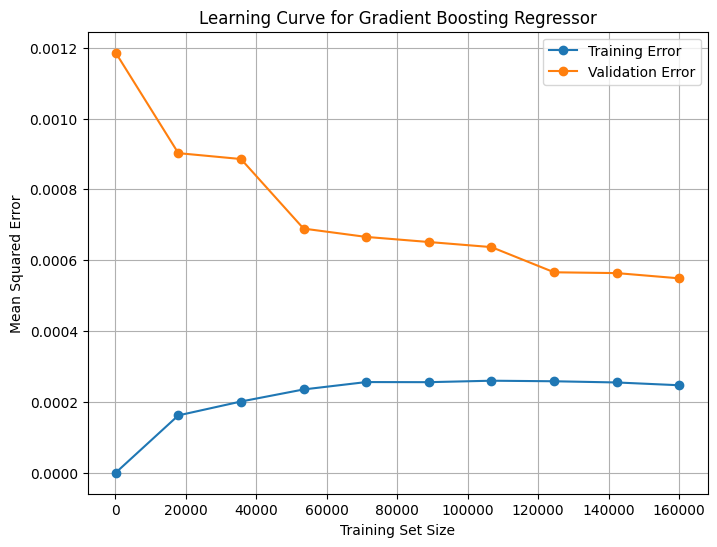

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

#learning curve implementation
train_sizes, train_scores, validation_scores = learning_curve(
    gb_model, X_data, y_data, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.001, 1.0, 10)
)

# Calculating mean and standard deviation for plotting
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker="o")
plt.plot(train_sizes, validation_scores_mean, label="Validation Error", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Gradient Boosting Regressor")
plt.legend()
plt.grid()
plt.show()



Testing Gradient Boosting model with different dataset sizes...
Training size: 40008 samples (20%)
  Training time: 6.5517 seconds
  Prediction time: 0.0183 seconds
  MSE: 0.0005
  R²: 0.5055
Training size: 80017 samples (40%)
  Training time: 16.3757 seconds
  Prediction time: 0.0703 seconds
  MSE: 0.0005
  R²: 0.5226
Training size: 120026 samples (60%)
  Training time: 25.9196 seconds
  Prediction time: 0.0869 seconds
  MSE: 0.0005
  R²: 0.5597
Training size: 160035 samples (80%)
  Training time: 36.6252 seconds
  Prediction time: 0.1453 seconds
  MSE: 0.0005
  R²: 0.5462
Training size: 200044 samples (100%)
  Training time: 44.8960 seconds
  Prediction time: 0.3226 seconds
  MSE: 0.0005
  R²: 0.5655


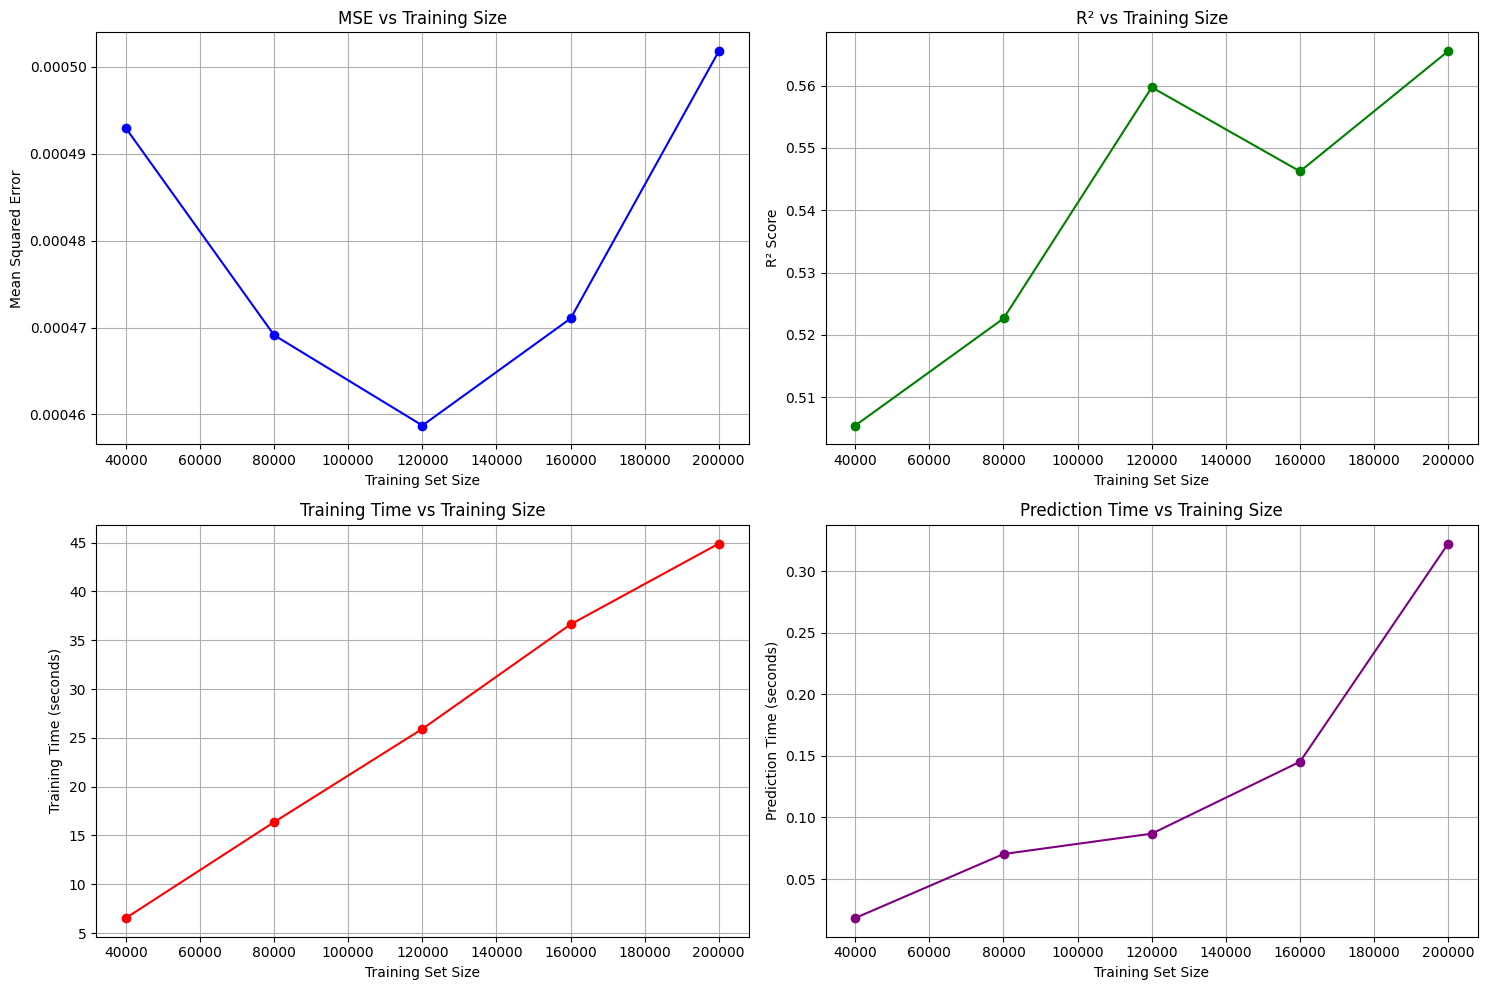


Performance Results:
   train_size  train_time  test_time       mse        r2
0       40008    6.551727   0.018334  0.000493  0.505457
1       80017   16.375693   0.070321  0.000469  0.522633
2      120026   25.919568   0.086873  0.000459  0.559720
3      160035   36.625232   0.145334  0.000471  0.546234
4      200044   44.895972   0.322604  0.000502  0.565541


In [ ]:
# Testing model with different dataset sizes
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("\nTesting Gradient Boosting model with different dataset sizes...")

#dataset sizes to test (percentages of the full dataset)
data_fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
results = {
    'train_size': [],
    'train_time': [],
    'test_time': [],
    'mse': [],
    'r2': []
}

#full dataset by combining train and test sets
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

for fraction in data_fractions:
    # Sample a subset of the data
    sample_size = int(len(X_full) * fraction)

    # Random sampling without replacement
    indices = np.random.choice(len(X_full), sample_size, replace=False)
    X_sample = X_full.iloc[indices]
    y_sample = y_full.iloc[indices]

    # Spliting into train/test
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=123
    )

    # Training a new model on this data sample
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=123
    )

    # Measure training time
    start_time = time.time()
    model.fit(X_train_sample, y_train_sample)
    train_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_sample)
    test_time = time.time() - start_time

    # Calculate metrics
    mse = mean_squared_error(y_test_sample, y_pred)
    r2 = r2_score(y_test_sample, y_pred)

    # Store results
    results['train_size'].append(sample_size)
    results['train_time'].append(train_time)
    results['test_time'].append(test_time)
    results['mse'].append(mse)
    results['r2'].append(r2)

    print(f"Training size: {sample_size} samples ({fraction*100:.0f}%)")
    print(f"  Training time: {train_time:.4f} seconds")
    print(f"  Prediction time: {test_time:.4f} seconds")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")

# Plot the results
plt.figure(figsize=(15, 10))

# Plot MSE vs Training Size
plt.subplot(2, 2, 1)
plt.plot(results['train_size'], results['mse'], 'o-', color='blue')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Training Size')
plt.grid(True)

# Plot R² vs Training Size
plt.subplot(2, 2, 2)
plt.plot(results['train_size'], results['r2'], 'o-', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('R² vs Training Size')
plt.grid(True)

# Plot Training Time vs Training Size
plt.subplot(2, 2, 3)
plt.plot(results['train_size'], results['train_time'], 'o-', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Training Size')
plt.grid(True)

# Plot Prediction Time vs Training Size
plt.subplot(2, 2, 4)
plt.plot(results['train_size'], results['test_time'], 'o-', color='purple')
plt.xlabel('Training Set Size')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time vs Training Size')
plt.grid(True)

plt.tight_layout()
plt.show()

#DataFrame of results for easier viewing
results_df = pd.DataFrame(results)
print("\nPerformance Results:")
print(results_df)